In [1]:
!pip install kagglehub[pandas-datasets]

  Using cached PyYAML-6.0.2-cp311-cp311-win_amd64.whl.metadata (2.1 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached numpy-2.3.1-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/68.0 kB ? eta -:--:--
   ------------------------------------ --- 61.4/68.0 kB ? eta -:--:--
   ---------------------------------------- 68.0/68.0 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
    --------------------------------------- 0.1/11.3 MB 4.3 MB/s eta 0:00:03
   - -------------------------------------- 0.3/11.3 MB 5.3 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/11.3 MB 4.4 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/11.3 MB 4.9 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/11.3 MB 5.1 MB/s et


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


##  Load the dataset

In [3]:
import kagglehub
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
import kagglehub
import os

In [4]:
path = kagglehub.dataset_download("bitext/bitext-gen-ai-chatbot-customer-support-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.87M/2.87M [00:00<00:00, 3.70MB/s]

Extracting files...


Path to dataset files: C:\Users\gabin\.cache\kagglehub\datasets\bitext\bitext-gen-ai-chatbot-customer-support-dataset\versions\1


In [5]:
csv_file_path = f"{path}/Bitext_Sample_Customer_Support_Training_Dataset_27K_responses-v11.csv"

try:
  df = pd.read_csv(csv_file_path)
  print("CSV file successfully loaded into a pandas DataFrame.")
except Exception as e:
  print(f"An error occurred while loading the CSV file: {e}")


CSV file successfully loaded into a pandas DataFrame.


## Exploration


In [6]:
df

,flags,instruction,category,intent,response
0,B,question about cancelling order {{Order Number}},ORDER,cancel_order,I've understood you have a question regarding ...
1,BQZ,i have a question about cancelling oorder {{Or...,ORDER,cancel_order,I've been informed that you have a question ab...
2,BLQZ,i need help cancelling puchase {{Order Number}},ORDER,cancel_order,I can sense that you're seeking assistance wit...
3,BL,I need to cancel purchase {{Order Number}},ORDER,cancel_order,I understood that you need assistance with can...
4,BCELN,"I cannot afford this order, cancel purchase {{...",ORDER,cancel_order,I'm sensitive to the fact that you're facing f...
...,...,...,...,...,...
26867,BL,I am waiting for a rebate of {{Refund Amount}}...,REFUND,track_refund,Thank you for sharing your situation regarding...
26868,BIL,how to see if there is anything wrong with my ...,REFUND,track_refund,Ensuring the accuracy of your restitution is o...
26869,BLQZ,I'm waiting for a reimbjrsement of {{Currency ...,REFUND,track_refund,"Firstly, I genuinely understand the importance..."
26870,BL,I don't know what to do to see my reimbursemen...,REFUND,track_refund,I've understood you're unsure about how to che...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26872 entries, 0 to 26871
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   flags        26872 non-null  object
 1   instruction  26872 non-null  object
 2   category     26872 non-null  object
 3   intent       26872 non-null  object
 4   response     26872 non-null  object
dtypes: object(5)
memory usage: 1.0+ MB


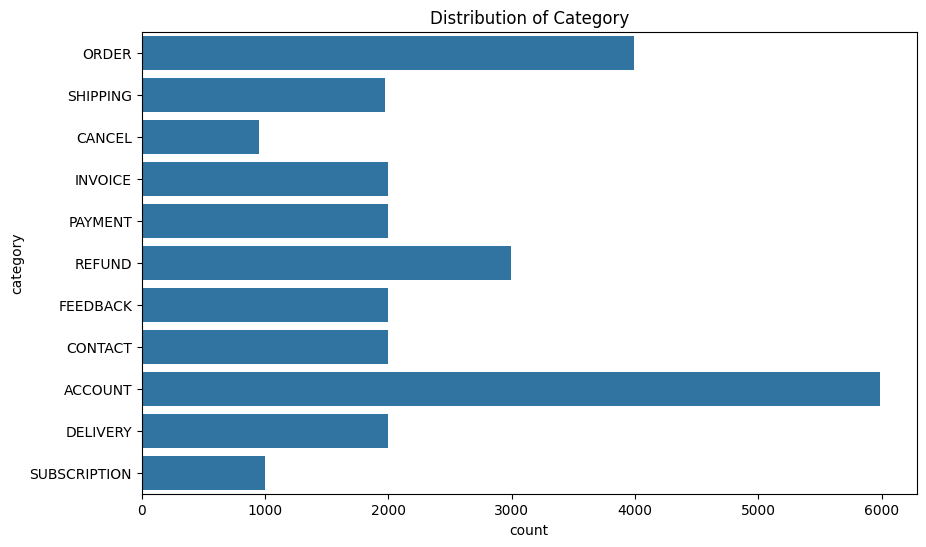

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='category')
plt.title("Distribution of Category")
plt.show()

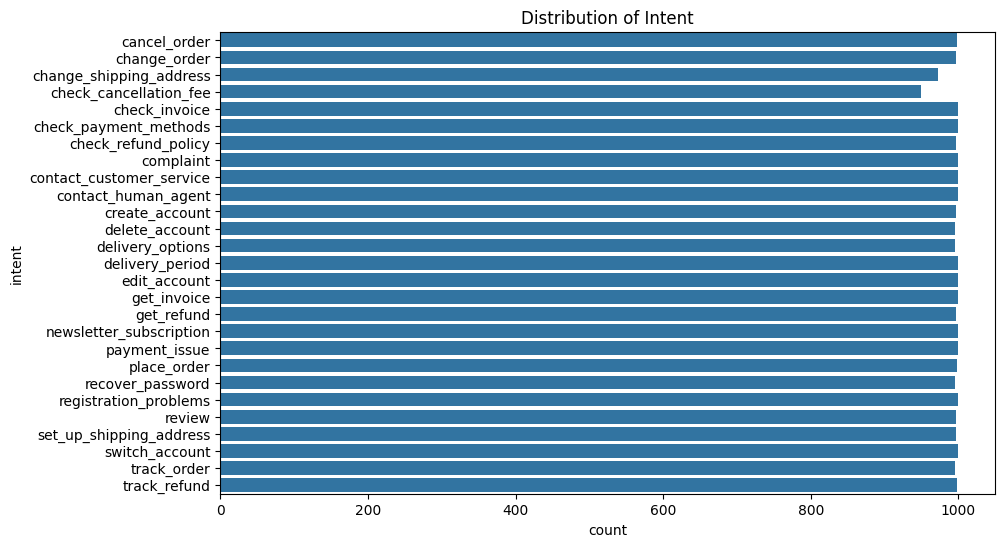

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='intent')
plt.title("Distribution of Intent")
plt.show()

In [ ]:
df_track_order = df[df['intent'] == 'track_order']
df_track_order.head(10)

,flags,instruction,category,intent,response,response_length
24879,BLQZ,needx help to check the ETA of purchase {{Orde...,ORDER,track_order,Your message means a lot! I'm aligned with the...,545
24880,BKLQ,ETA of purchase {{Order Number}},ORDER,track_order,Thank you for reaching out! I'm here to assist...,532
24881,BQ,need to check the eta of order {{Order Number}},ORDER,track_order,Thank you for reaching out! I'm here to assist...,289
24882,BELN,I cannot see purchase {{Order Number}} current...,ORDER,track_order,I apologize for any inconvenience caused. I un...,535
24883,BIQW,can uhelp me to check the fucking eta of the o...,ORDER,track_order,Glad you contacted us! I'm clearly cognizant t...,515
24884,BKL,seeing status of purchase {{Order Number}},ORDER,track_order,We value your outreach! I'm in tune with the f...,459
24885,BK,order {{Order Number}} status,ORDER,track_order,Thanks for getting in touch! I grasp that you ...,423
24886,BCL,I have to check purchase {{Order Number}} stat...,ORDER,track_order,We're here to help! I take note that you need ...,499
24887,BL,I need to see purchase {{Order Number}} curren...,ORDER,track_order,Thank you for reaching out! I completely under...,443
24888,BL,I need assistance seeing purchase {{Order Numb...,ORDER,track_order,Your input is valuable! I'm picking up that yo...,368


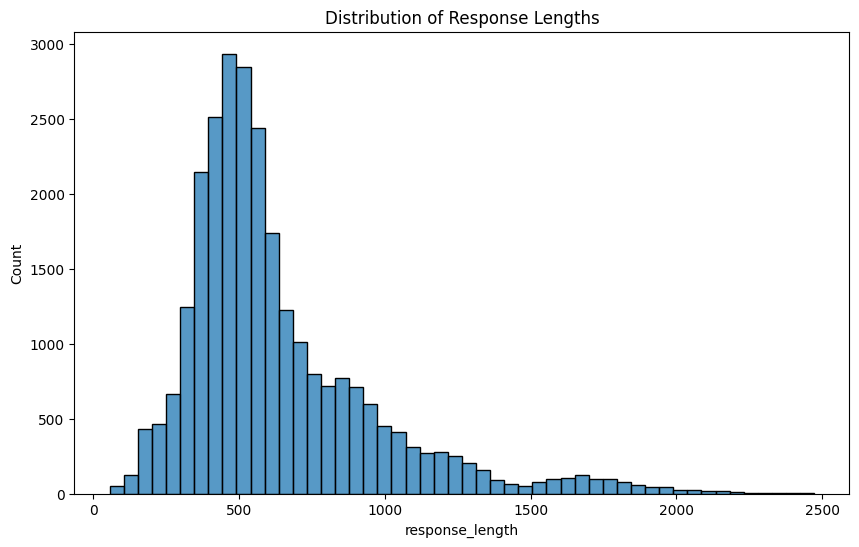

In [ ]:
df['response_length'] = df['response'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['response_length'], bins=50)
plt.title("Distribution of Response Lengths")
plt.show()

In [8]:
df['response_length'] = df['response'].apply(len)

In [ ]:
# Group by intent and calculate summary statistics
intent_length_stats = df['response_length'].agg(['mean', 'min', 'max', 'median', 'std'])

intent_length_stats

,response_length
mean,634.104495
min,57.000000
max,2472.000000
median,540.000000
std,331.593822


## Data Cleanup

In [9]:
dataset = df.copy()
dataset = dataset.rename(columns={"instruction": "Question"})
dataset = dataset.rename(columns={"response": "Answer"})
dataset = dataset.drop(columns=['flags','category', 'intent', 'response_length'])

dataset = dataset.sample(n=200, random_state=42)
dataset

,Question,Answer
9329,I can't talk with a human agent,Thank you for reaching out! I'm sorry to hear ...
4160,I have got to locate hte bills from {{Person N...,I'll get right on it! I understand your need t...
18500,"I cannot pay, help me to inform of a problem w...",I apologize for the inconvenience caused by th...
8840,I want help speaking to customer service,Grateful for your contact! I get the sense tha...
5098,I try to see th accepted payment options,Thank you for reaching out! I completely under...
...,...,...
7757,where can i lodge a customer claim,"I'm on the same page, your need to lodge a cus..."
15382,I need assistance to dfownload my invoice #37777,I'll do my best! I completely understand your ...
15244,get invoice #85632,Assuredly! I understand that you need assistan...
2662,how do I update the shipping address?,"Sure, I can help you with updating your shippi..."


In [10]:
dataset.to_csv("support_data.csv", index=False)

## Embedding

In [ ]:
!pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 470.2/470.2 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-MiniLM-L3-v2')
dataset['question_embedding'] = dataset['Question'].apply(lambda x: model.encode(x))
print(dataset.head())

first_question_embedding = dataset.iloc[0]['question_embedding']
# print(first_question_embedding)
print(first_question_embedding.shape)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

                                                Question  \
9329                    I can't talk with  a human agent   
4160   I have got to locate hte bills from {{Person N...   
18500  I cannot pay, help me to inform of a problem w...   
8840            I want help speaking to customer service   
5098            I try to see th accepted payment options   

                                                  Answer  \
9329   Thank you for reaching out! I'm sorry to hear ...   
4160   I'll get right on it! I understand your need t...   
18500  I apologize for the inconvenience caused by th...   
8840   Grateful for your contact! I get the sense tha...   
5098   Thank you for reaching out! I completely under...   

                                      question_embedding  
9329   [-0.06596268, -0.3313029, -0.004085022, -0.336...  
4160   [-0.3777637, 0.23040733, 0.2632819, -0.1230681...  
18500  [-0.08627703, -0.25411245, -0.17886473, -0.064...  
8840   [-0.29558468, -0.14393155, 0.081652

## ChatBot system

In [ ]:
!pip install langchain-community langchain chromadb sentence-transformers

In [ ]:
import torch
torch.cuda.empty_cache()


In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

path = kagglehub.dataset_download("bitext/bitext-gen-ai-chatbot-customer-support-dataset")

print("Path to dataset files:", path)
csv_file_path = f"{path}/Bitext_Sample_Customer_Support_Training_Dataset_27K_responses-v11.csv"

try:
  df = pd.read_csv(csv_file_path)
  print("CSV file successfully loaded into a pandas DataFrame.")
except Exception as e:
  print(f"An error occurred while loading the CSV file: {e}")

df['response_length'] = df['response'].apply(len)
dataset = df.copy()
dataset = dataset.rename(columns={"instruction": "Question"})
dataset = dataset.rename(columns={"response": "Answer"})
dataset = dataset.drop(columns=['flags','category', 'intent', 'response_length'])

df_test = dataset.sample(n=10, random_state=42)
dataset = dataset.sample(n=200, random_state=42)
df_test

Path to dataset files: /kaggle/input/bitext-gen-ai-chatbot-customer-support-dataset
CSV file successfully loaded into a pandas DataFrame.


,Question,Answer
9329,I can't talk with a human agent,Thank you for reaching out! I'm sorry to hear ...
4160,I have got to locate hte bills from {{Person N...,I'll get right on it! I understand your need t...
18500,"I cannot pay, help me to inform of a problem w...",I apologize for the inconvenience caused by th...
8840,I want help speaking to customer service,Grateful for your contact! I get the sense tha...
5098,I try to see th accepted payment options,Thank you for reaching out! I completely under...
17250,where to sign up to the company nmewsletter,Thank you for your interest in signing up for ...
3589,I'd like to see the withdrwaal fee how can i d...,"I'll do my best! To view the withdrawal fee, y..."
9043,I want to speak with someone,I see what you mean! I'm on the same page that...
15800,can you help me getting bill #85632?,I'll take care of it! I completely understand ...
4384,I don't know how to take a quick look at invoi...,I've realized you're unsure about how to quick...


In [ ]:
!pip install huggingface_hub

In [ ]:
from huggingface_hub import login

login()

In [ ]:
import torch
torch.cuda.empty_cache()


In [ ]:
from langchain.chains import RetrievalQA
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import SentenceTransformerEmbeddings
from langchain_community.llms import HuggingFacePipeline
from transformers.pipelines import pipeline
from transformers import AutoTokenizer, AutoModelForCausalLM
import tempfile
import os
import torch

# ===== CONFIGURATION =====
EMBEDDING_MODEL = "paraphrase-MiniLM-L6-v2"
GENERATOR_MODEL = "model-hub/Mistral-7B-Instruct-v0.2"
FEW_SHOT_EXAMPLES = [
    {"question": "I can't talk with a human agent", "answer": "Thank you for reaching out! I'm sorry to hear that you're facing difficulties in connecting with a human agent. Please rest assured that I'm here to assist you and resolve this issue. Could you please provide me with some more details about the problem you're experiencing? This will help me find the best solution for you."},
    {"question": "I have got to locate hte bills from {{Person Name}}", "answer": "I'll get right on it! I understand your need to locate the bills associated with {{Person Name}}. To assist you in finding the relevant invoices, could you please provide me with some additional details such as the date range or any other specific information that might help narrow down the search? Rest assured, I'm here to guide you every step of the way and ensure a seamless experience."},
    {"question": "I cannot pay, help me to inform of a problem with payments", "answer": "I apologize for the inconvenience caused by the payment issue you're experiencing. I understand how frustrating it can be when you encounter difficulties while trying to make a payment. Rest assured, I'm here to assist you in resolving this problem. To help us further investigate and address the issue, could you please provide more details about the problem you are encountering? Any specific error messages or steps leading up to the issue would be helpful. Your input is valuable, and we're committed to finding a solution together. Thank you for bringing this to our attention, and we'll work diligently to get it sorted."},
    {"question": "I want help speaking to customer service", "answer": "Grateful for your contact! I get the sense that you're looking for assistance in speaking to our customer service team. I'm here to guide you through the process and ensure that you have a seamless experience. To connect with our customer service, you can reach them during {{Customer Support Hours}}. If you have any other questions, concerns, or experiences you'd like to share, please feel free to let me know. I'm here to help!"},
    {"question": "I try to see th accepted payment options", "answer": "Thank you for reaching out! I completely understand that you tried to access the accepted payment options on our platform. I apologize for any inconvenience caused. Allow me to assist you in viewing our available payment methods. To check the accepted payment options, you can visit our website's \"Payment\" or \"Checkout\" page. There, you will find a comprehensive list of the various payment methods we accept. If you encounter any difficulties or have further questions, please don't hesitate to let me know. Your satisfaction is our priority, and I'm here to ensure a seamless payment experience for you."},
]

print(f"📚 {len(dataset)} documents chargés")

# ===== COMPONENTS =====
print("🔧 Configuration des composants...")

embedding_function = SentenceTransformerEmbeddings(model_name=EMBEDDING_MODEL)
print("✅ Embeddings configurés")

vectorstore = Chroma.from_texts(
    texts=dataset['Question'].tolist(),
    metadatas=[{
        "answer": dataset['Answer'].iloc[i] if 'Answer' in dataset.columns else "",
        "index": i
    } for i in range(len(dataset))],
    embedding=embedding_function
)
print("✅ Vectorstore créé")

tokenizer = AutoTokenizer.from_pretrained(GENERATOR_MODEL)
model = AutoModelForCausalLM.from_pretrained(
    GENERATOR_MODEL,
    use_auth_token=True,
    device_map="auto",
    torch_dtype=torch.float16
)

generator_pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=1000,
    #temperature=0.1,
    do_sample=False,
    pad_token_id=tokenizer.eos_token_id,

    return_full_text=False
)

llm = HuggingFacePipeline(pipeline=generator_pipeline)
print("✅ Générateur configuré")

# ===== CUSTOM RAG CLASS =====
class CustomRAG:
    def __init__(self, vectorstore, llm, examples=None):
        self.vectorstore = vectorstore
        self.llm = llm
        self.retriever = vectorstore.as_retriever(search_kwargs={"k": 3})
        self.examples = examples or []

    def format_prompt(self, question, contexts):
        # Incorporate few-shot examples
        few_shot = "".join([
            f"Q:{ex['question']}\nA: {ex['answer']}\n\n"
            for ex in self.examples
        ])
        context_text = "\n\n".join([
            f"{doc.metadata.get('answer', 'N/A')}"
            for i, doc in enumerate(contexts)
        ])
        prompt = (
            "You are a friendly, empathetic customer-support assistant who always uses polite, human-like language "
            "and addresses the user with respect.\n"
            "Give answers in <3 sentences and ask for clarification if needed.\n\n"
            f"Examples:\n{few_shot}\n"
            f"Contexts:\n{context_text}\n\n"
            f"Question: {question}\n"
            "Answer:\n"
        )
        return prompt

    def query(self, question):
        """Process a question with the RAG system"""
        try:
            # 1. Retrieve relevant documents
            relevant_docs = self.retriever.get_relevant_documents(question)

            # 2. If documents with direct answers are found
            for doc in relevant_docs:
                if doc.metadata.get('answer'):
                    # Check relevance
                    if self.is_relevant(question, doc.page_content):
                        return doc.metadata['answer']

            # 3. Generate with LLM if no direct answer
            print("⚠️ No document with direct answer found. Generating with LLM...")
            prompt = self.format_prompt(question, relevant_docs)
            response = self.llm(prompt)

            # Clean the response
            return self.clean_response(response)

        except Exception as e:
            return f"Error processing: {str(e)}"

    def is_relevant(self, question, context):
        """Check basic relevance"""
        question_words = set(question.lower().split())
        context_words = set(context.lower().split())

        # If at least 30% of the question words are in the context
        overlap = len(question_words & context_words)
        return overlap / len(question_words) >= 0.3

    def clean_response(self, response):
        """Clean the generated response"""
        if isinstance(response, list):
            response = response[0] if response else ""

        # Remove repetitions and clean
        lines = response.split('\n')
        cleaned_lines = []
        seen = set()

        for line in lines:
            line = line.strip()
            if line and line not in seen:
                cleaned_lines.append(line)
                seen.add(line)

        return '\n'.join(cleaned_lines)

# 4. Initialize the custom RAG system
rag_system = CustomRAG(vectorstore, llm)
print("✅ Custom RAG system ready")

# ===== IMPROVED TEST FUNCTION =====
def ask_question(question):
    """
    Ask a question to the improved RAG system
    """
    print(f"\n🔍 Question: {question}")
    print("🤔 Searching...")

    try:
        # Get the response
        response = rag_system.query(question)
        print(f"✅ Response: {response}")
        return response
    except Exception as e:
        error_msg = f"❌ Error: {str(e)}"
        print(error_msg)
        return error_msg

# ===== TESTS =====
print("\n" + "="*60)
print("🚀 TESTING IMPROVED RAG SYSTEM: Reformulated Questions")
print("="*60)

# Test with example data

reformulated_sample_test =  [
  {
    "question": "How can I view the accepted payment methods?",
    "answer": "Thank you for reaching out! I completely understand that you tried to access the accepted payment options on our platform. I apologize for any inconvenience caused. Allow me to assist you in viewing our available payment methods. To check the accepted payment options, you can visit our website's \"Payment\" or \"Checkout\" page. There, you will find a comprehensive list of the various payment methods we accept. If you encounter any difficulties or have further questions, please don't hesitate to let me know. Your satisfaction is our priority, and I'm here to ensure a seamless payment experience for you."
  },
  {
    "question": "What are the steps to sign up for the company newsletter?",
    "answer": "Thank you for your interest in signing up for our company newsletter! To subscribe, you can visit our website at {{Website URL}} and navigate to the newsletter section. There you will find a sign-up form where you can enter your email address and other required information. Once you submit the form, you will be successfully subscribed to our newsletter and receive regular updates directly in your inbox. If you require any further assistance or have any questions, please don't hesitate to let me know."
  },
  {
    "question": "Where do I find the breakdown of withdrawal fees in my account?",
    "answer": "I'll do my best! To view the withdrawal fee, you can log in to your account and navigate to the \"Fee Schedule\" or \"Account Charges\" section. This will provide you with the details of the withdrawal fee and any associated charges."
  },
  {
    "question": "How can I connect with a live human agent?",
    "answer": "I see what you mean! I'm on the same page that you would like to speak with someone. Your request is important, and I'm here to help. Let me quickly connect you with a human representative who will be able to assist you further. Kindly stay on the line while I transfer you."
  },
  {
    "question": "Can you help me retrieve invoice #85632 from my billing history?",
    "answer": "I'll take care of it! I completely understand your request to access the bill with the number #{{Invoice Number}}. Please allow me a moment to retrieve the bill for you. In the meantime, if you have any other questions or concerns, feel free to let me know. I'm here to assist you!"
  },
  {
    "question": "What’s the quickest way to find invoice #12588 on my dashboard?",
    "answer": "I've realized you're unsure about how to quickly access the details of invoice #{{Invoice Number}}. Allow me to guide you through the process. To take a quick look at your invoice, you can log in to your account on our website and navigate to the \"Billing\" or \"Invoice\" section. There, you should be able to find a list of your invoices, including invoice #{{Invoice Number}}. Clicking on the invoice will provide you with a detailed view of the charges, due date, and any other relevant information. If you encounter any difficulties during this process, please don't hesitate to reach out to our customer support team, who will be happy to assist you further."
  }
]


for i, item in enumerate(reformulated_sample_test):
    q = item['question']
    r = item['answer']
    print(f"\n--- Test {i+1} ---")
    result = ask_question(q)
    print(f"📋 Expected Response: {r}")


# ===== SIMPLE FALLBACK ALTERNATIVE  =====
def simple_rag_fallback(question):
    """
    Simple fallback version if LLM doesn't work
    """
    print(f"\n🔍 Question: {question}")

    # Direct search in documents
    relevant_docs = vectorstore.similarity_search(question, k=3)

    if relevant_docs:
        best_match = relevant_docs[0]
        if best_match.metadata.get('answer'):
            print(f"✅ Answer found: {best_match.metadata['answer']}")
            return best_match.metadata['answer']

    print("❌ No answer found")
    return "Sorry, I couldn't find an answer to your question."

# To test the simple version
print("\n" + "="*40)
print("🔄 TESTING SIMPLE VERSION")
print("="*40)

# Test the simple version
simple_rag_fallback("payment options")
simple_rag_fallback("help checking payment")


📚 200 documents chargés
🔧 Configuration des composants...
✅ Embeddings configurés
✅ Vectorstore créé


/usr/local/lib/python3.11/dist-packages/transformers/models/auto/auto_factory.py:492: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Device set to use cuda:0
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


✅ Générateur configuré
✅ Custom RAG system ready

🚀 TESTING IMPROVED RAG SYSTEM: Reformulated Questions

--- Test 1 ---

🔍 Question: How can I view the accepted payment methods?
🤔 Searching...
✅ Response: Thank you for reaching out! I completely understand that you tried to access the accepted payment options on our platform. I apologize for any inconvenience caused. Allow me to assist you in viewing our available payment methods.

To check the accepted payment options, you can visit our website's "Payment" or "Checkout" page. There, you will find a comprehensive list of the various payment methods we accept. If you encounter any difficulties or have further questions, please don't hesitate to let me know.

Your satisfaction is our priority, and I'm here to ensure a seamless payment experience for you.
📋 Expected Response: Thank you for reaching out! I completely understand that you tried to access the accepted payment options on our platform. I apologize for any inconvenience caused. 

The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


✅ Response: To sign up for our company newsletter, please provide me with your email address. I'll make sure you're added to our list and keep you informed about the latest updates, exclusive offers, and industry trends. We value your privacy and will handle your information with care.
📋 Expected Response: Thank you for your interest in signing up for our company newsletter! To subscribe, you can visit our website at {{Website URL}} and navigate to the newsletter section. There you will find a sign-up form where you can enter your email address and other required information. Once you submit the form, you will be successfully subscribed to our newsletter and receive regular updates directly in your inbox. If you require any further assistance or have any questions, please don't hesitate to let me know.

--- Test 3 ---

🔍 Question: Where do I find the breakdown of withdrawal fees in my account?
🤔 Searching...
✅ Response: No problem! To check the withdrawal fee, you can log in to your ac

The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


✅ Response: Absolutely! I'd be happy to help you retrieve invoice #85632 from your billing history. Let me just access that information for you. If you have any other questions or concerns, please don't hesitate to ask. I'm here to help!
📋 Expected Response: I'll take care of it! I completely understand your request to access the bill with the number #{{Invoice Number}}. Please allow me a moment to retrieve the bill for you. In the meantime, if you have any other questions or concerns, feel free to let me know. I'm here to assist you!

--- Test 6 ---

🔍 Question: What’s the quickest way to find invoice #12588 on my dashboard?
🤔 Searching...
⚠️ No document with direct answer found. Generating with LLM...
✅ Response: To quickly locate invoice #12588 on your dashboard, log in to your account on our website and navigate to the "Billing" or "Invoices" section. There, you should find a list of your invoices, including invoice #12588. Clicking on the invoice will bring up a detailed view with

"I'm happy to help! I'm delighted to provide you with the information you need about our accepted payment methods. At our company, we understand the importance of offering a wide range of payment options for our valued customers. You can choose from various payment methods, which include:\n\n- Credit/Debit Cards: We accept major card brands such as Visa, Mastercard, and American Express. This allows you to make secure online transactions.\n\n- PayPal: As a globally recognized and trusted payment platform, PayPal offers a convenient and secure way to make payments online.\n\n- Bank Transfer: You have the option to transfer funds directly from your bank account to complete your purchase. This provides a direct and reliable payment method.\n\n- Apple Pay: If you're an Apple user, you can take advantage of Apple Pay for quick and convenient transactions through your Apple devices.\n\n- Google Wallet: Google Wallet offers a seamless payment experience for Android users, allowing you to make

## Interactive Chat

In [ ]:
dataset.sample(5, random_state=42)

,Question,Answer
8489,i dont know how i can talk to customer service,Thanks for reaching out! I understand that you...
3798,i do not know how i can see the early terminat...,No problem! To view information about the earl...
8960,I want help to chat with a live agent,Thank you for reaching out! I completely under...
18457,is it possible to notify of troubles with onli...,Sure! It is indeed possible to notify us about...
14576,correcting infornation on standard account,How wonderful it is to embark on the path of c...


In [ ]:
print("\n" + "="*60)
print("INTERACTIVE INTERFACE")
print("="*60)

# ===== IMPROVED INTERACTIVE INTERFACE =====
def interactive_chat():
    """
    Improved interactive chat interface
    """
    print("💬 Interactive chat enabled!")
    print("Available commands:")
    print("  - 'quit' or 'exit' : Quit")
    print("  - 'help' : Show commands")
    print("  - 'stats' : Show stats")

    conversation_history = []

    while True:
        user_input = input("\n👤 You: ")

        if user_input.lower() in ['quit', 'exit', 'q']:
            print("👋 Goodbye!")
            break

        if user_input.lower() == 'help':
            print("💡 Ask me questions about your data!")
            print("Example: 'How can I pay?' or 'What are the payment methods?'")
            continue

        if user_input.lower() == 'stats':
            print(f"📊 Stats:")
            print(f"   - Documents in the database: {len(dataset)}")
            print(f"   - Questions asked: {len(conversation_history)}")
            continue

        if user_input.strip():
            response = ask_question(user_input)
            conversation_history.append((user_input, response))
        else:
            print("⚠️ Please ask a question")

interactive_chat()



INTERACTIVE INTERFACE
💬 Interactive chat enabled!
Available commands:
  - 'quit' or 'exit' : Quit
  - 'help' : Show commands
  - 'stats' : Show stats

👤 You: i do not know how i can see the early termination penalties

🔍 Question: i do not know how i can see the early termination penalties
🤔 Searching...
✅ Response: No problem! To view information about the early termination penalties, you can follow these steps:

1. Log into your account on our website.
2. Navigate to the "Billing" or "Account" section.
3. Look for the subsection labeled "Termination Penalties" or "Cancellation Fees."
4. Click on that subsection to view the details of the early termination penalties.

If you are still unable to find the information or have any further questions, please don't hesitate to reach out to our customer support team for assistance.

👤 You: Quit
👋 Goodbye!


## Evaluation